In [1]:
import numpy as np
from sklearn import datasets
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
sns.set(style='whitegrid', context='notebook')

In [3]:
iris2 = sns.load_dataset('iris')

In [4]:
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Correlation

Center the variable by subtracting the mean and scaling it with the standard deviation of the dataset.

$$z = \frac{x_{i} - \mu}{\sigma}$$

## Covariance/correlation method

Now, it is time to introduce a new way of estimating the coefficient of our regressing line. In the process, we learn other statistical measures, like covariance and correlation. This will also help us when analysing a dataset for the first time and drawing our first conclusions.

### Covariance

Covariance is a statistical term, and can be defined as:
- A measure of the systematic relationship betwewen a pair of random variables, wherein, a change in one variable is reciprocated by an equivalent change in another variable.

Covariance can takae any value between $-\infty$ to $\infty$, wherein, a negative value is an indicator of a negative relationship. Whereas, a positive value represents a positive relationship. It also ascertains a linear relationship between the two variables.

Therefore, when the value is 0, it indicates no direct linear relationship, and the values tend to form a blob-like distribution.

$$cov(x_{i}, y) = \frac{1}{n-1} \sum (x - \bar{x}) (y - \bar{y})$$

where: 
- $cov$ is the covariance,
- $n-1$ is the degrees of freedom.

In [5]:
def covariance (X, Y):
    xbar = np.mean(X)
    ybar = np.mean(Y)
    epsilion = 0
    for x, y in zip(X, Y):
        epsilion = epsilion + (x-xbar) * (y-ybar)
    return epsilion / (len(X) - 1)

In [6]:
print("Result of pre-defined covariance function, cov =", covariance([1,3,4], [1,0,2]))
print("Result of numpy covariance function, cov matrix =", np.cov([1,3,4], [1,0,2]))

Result of pre-defined covariance function, cov = 0.5
Result of numpy covariance function, cov matrix = [[2.33333333 0.5       ]
 [0.5        1.        ]]


The result should be equal to (1,0) and (0,1) of the matrix. In this case, 0.5.

This will be the starting point of our analysis, and we will be extending it towards each axis, with the correlation value.

The correlation value determines the degree to which two or more random variables move in tandem. During the study of two variables, if it has been observed that the movement of one variable is concordant, with an equivalent movement in another variable, then, the variables are said to be correlated. 

The formula is:

$$r = \frac{1}{n-1} * \frac{\sum(x_{i} - \bar{x}_{i}) (y - \bar{y})} {\sigma_{x_{i}} \sigma_{y}}$$

When $r$ is a positive value, the more $r$ approaches 1, the more it is directly correlated. Meaning, two variables move in the same direction.
When $r$ is a negative value, the more $r$ approaches -1, the more the two variables are in opposite directions. Hence the domain of $r$ is $-1 \leq r \leq +1$.

Let's break down why the denominator, $\sigma_{x_{i}} \sigma_{y_{i}}$, can be considered a measure of variance:

- Standard deviation measures the spread of data.
- Variance, $\sigma^{2}$, is the square of standard deviation, and quantifies the average of the squared differences from the mean. 
- Product of variances quantifies the "joint variability" of the two variables It tells us how much X and Y vary together.

In [7]:
def correlation(X, Y):
    return (covariance(X, Y) / (np.std(X, ddof=1) * np.std(Y, ddof=1)))

In [8]:
print("Result of pre-defined corr function, r =", correlation([1,1,4,3], [1,0,2,2]))
print("Result of numpy corr function =", np.corrcoef([1,1,4,3], [1,0,2,2]))

Result of pre-defined corr function, r = 0.8703882797784892
Result of numpy corr function = [[1.         0.87038828]
 [0.87038828 1.        ]]


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Summary of Variable Pairs, and Univariate Distributions')

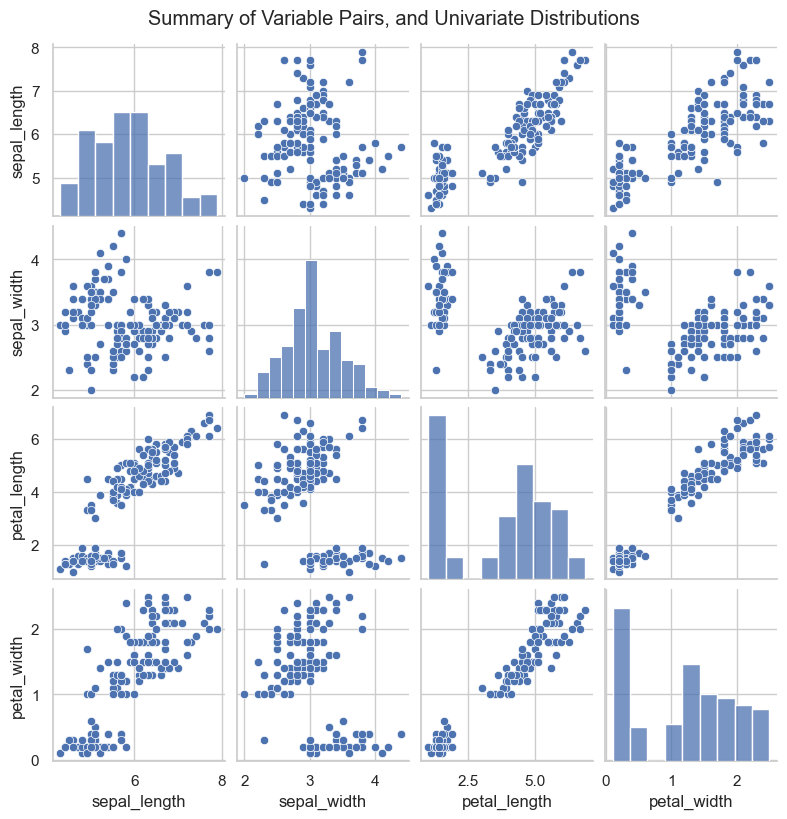

In [12]:
pairplot = sns.pairplot(iris2, size=2.0)
pairplot.fig.suptitle('Summary of Variable Pairs, and Univariate Distributions',
                      y=1.02)

Let's select two variables that, from our initial analysis, have the property of being linearly dependent. They are "petal width" and "petal length".

In [13]:
X = iris2['petal_width']
Y = iris2['petal_length']

Text(0.5, 1.0, 'Distribution of petal length against petal width')

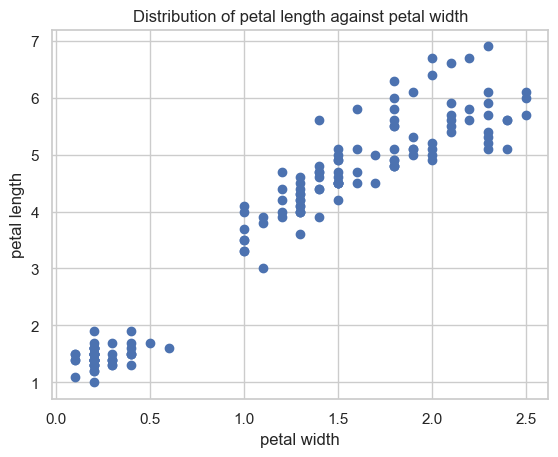

In [16]:
plt.scatter(X, Y)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.title('Distribution of petal length against petal width')

### Creating the prediction function

First, let's define the function that will represent the modeled data. This is in the form of linear function, in the form y = beta * x + alpha.

In [18]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

### Defining the error function

This shows us the difference between predictions and the expected output during training. As we will explain in depth in the next chapter, we have two main alternatives:

- measuring the absolute difference between values (or L1)
- or measuring a variant of the wquare of the difference (or L2).

Let's define both versions, including the first formulation inside the second.

In [20]:
def error(alpha, beta, x_i, y_i): #L1
    return y_i - predict(alpha, beta, x_i)

In [22]:
def sum_sq_e(alpha, beta, x, y):
    total_error = sum((error(alpha, beta, x_i, y_i) ** 2) 
                      for x_i, y_i in zip(x, y))
    return total_error


### Correlation fit

Now, we will define a function implementing the correlation method, to find the parameters for our regression:

In [32]:
def correlation_fit(x, y):
    beta = correlation(x, y) * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

In [33]:
alpha, beta = correlation_fit(X, Y)
print("Alpha =", alpha)
print("Beta =", beta)

Alpha = 1.0835580328505112
Beta = 2.229940495121864


Let's now graph the regressed line, with the data, in order to intuitively show the appropriateness of the solution:

Text(0.5, 1.0, 'Best fit line of petal length against petal width')

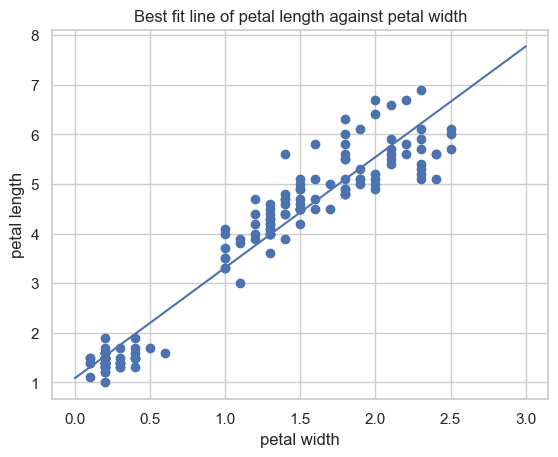

In [35]:
plt.scatter(X, Y)
xr = np.arange(0, 3.5)
plt.plot(xr, (xr*beta)+alpha)

plt.xlabel('petal width')
plt.ylabel('petal length')
plt.title('Best fit line of petal length against petal width')

In [36]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [39]:
ix = iris2['petal_width']
iy = iris2['petal_length']

x_plot = np.linspace(0, 2.6, 100)

X = ix.values[:, np.newaxis]

X_plot = x_plot[:, np.newaxis]

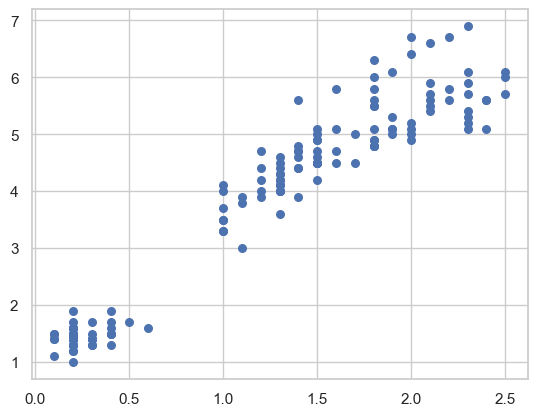

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.09261e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


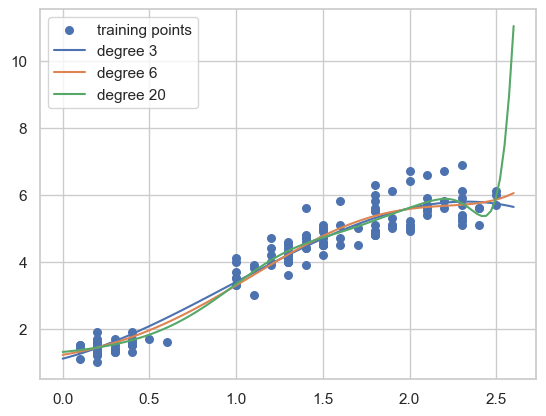

In [42]:
plt.scatter(ix, iy, s=30, marker='o', label='training points')
for count, degree in enumerate([3, 6, 20]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, iy)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label='degree %d' % degree)
    
plt.legend(loc='upper left')
plt.show()